In [3]:
df = pd.read_csv("Data/tu_doanh.csv", parse_dates=['Ngày'])

In [4]:
df.columns

Index(['Unnamed: 0', 'Mã', 'Ngày', 'KL mua', 'GT mua', 'KL bán', 'GT bán',
       'KL giao dịch ròng', 'GT giao dịch ròng'],
      dtype='object')

C:\Users\dongh\AppData\Local\Temp\ipykernel_22128\3375050513.py:10: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['%_change_close'] = df['lich_su_gia_(Giá đóng cửa)'].pct_change() * 100


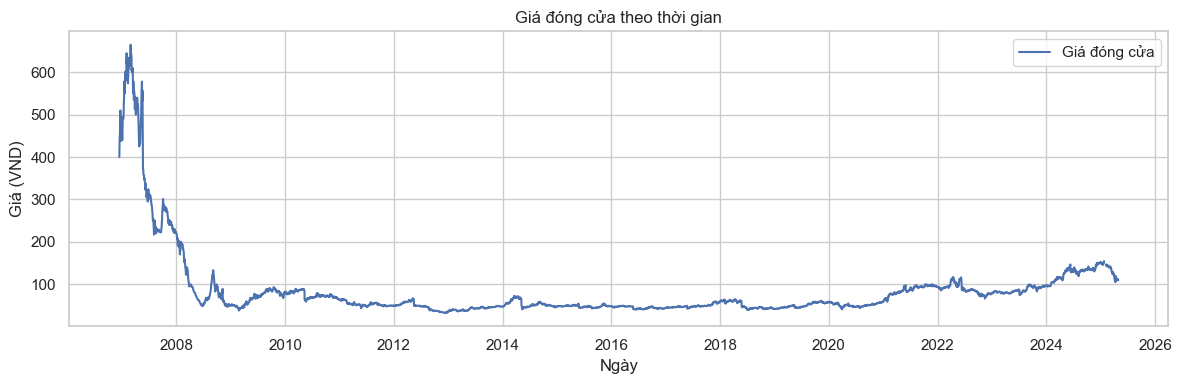

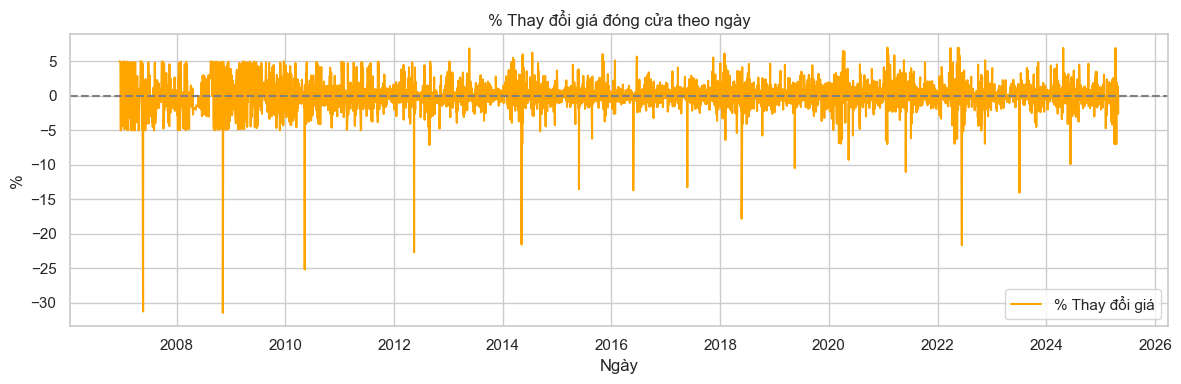

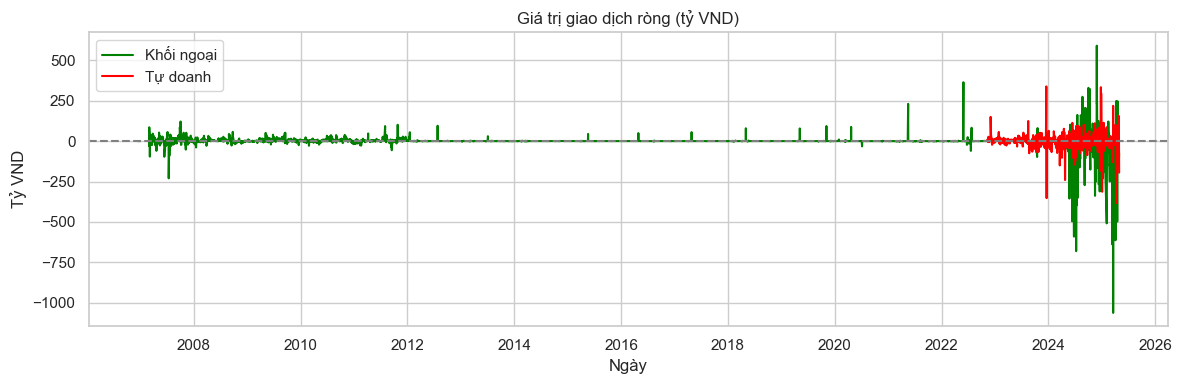

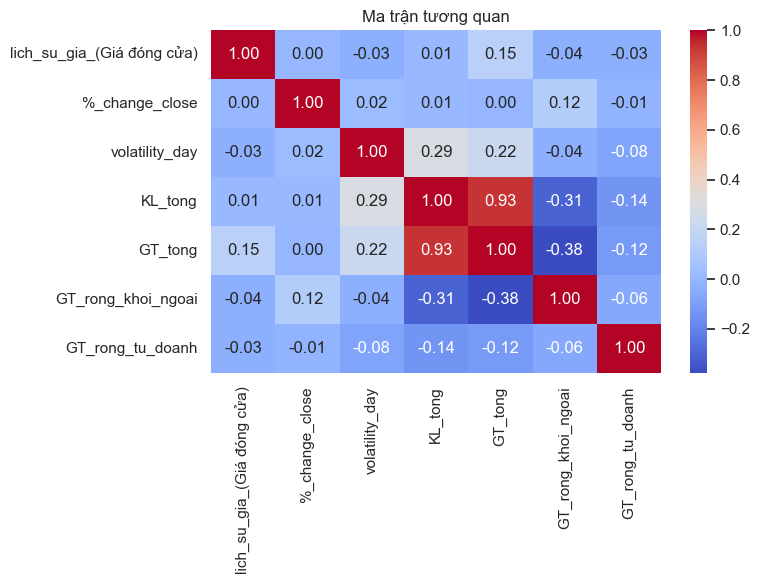

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu
df = pd.read_csv("Data/all_data.csv", parse_dates=['Ngày'])
df = df.sort_values("Ngày")

# Tính toán thêm cột
df['%_change_close'] = df['lich_su_gia_(Giá đóng cửa)'].pct_change() * 100
df['volatility_day'] = (df['lich_su_gia_(Giá cao nhất)'] - df['lich_su_gia_(Giá thấp nhất)']) / df['lich_su_gia_(Giá mở cửa)'] * 100
df['KL_tong'] = df['lich_su_gia_(KL khớp lệnh)'].fillna(0) + df['lich_su_gia_(KL thỏa thuận)'].fillna(0)
df['GT_tong'] = df['lich_su_gia_(GT khớp lệnh (tỷ))'] + df['lich_su_gia_(GT thỏa thuận (tỷ))']
df['GT_rong_khoi_ngoai'] = df['khoi_ngoai_(GT giao dịch ròng)']
df['GT_rong_tu_doanh'] = df['tu_doanh_(GT giao dịch ròng)']

# Thiết lập style chung
sns.set(style="whitegrid")

# 1. Đường giá đóng cửa
plt.figure(figsize=(12, 4))
plt.plot(df['Ngày'], df['lich_su_gia_(Giá đóng cửa)'], label='Giá đóng cửa')
plt.title("Giá đóng cửa theo thời gian")
plt.xlabel("Ngày")
plt.ylabel("Giá (VND)")
plt.legend()
plt.tight_layout()
plt.show()

# 2. Biểu đồ phần trăm thay đổi giá
plt.figure(figsize=(12, 4))
plt.plot(df['Ngày'], df['%_change_close'], label='% Thay đổi giá', color='orange')
plt.axhline(0, linestyle='--', color='gray')
plt.title("% Thay đổi giá đóng cửa theo ngày")
plt.xlabel("Ngày")
plt.ylabel("%")
plt.legend()
plt.tight_layout()
plt.show()

# 4. Biểu đồ giao dịch ròng của khối ngoại & tự doanh
plt.figure(figsize=(12, 4))
plt.plot(df['Ngày'], df['GT_rong_khoi_ngoai'], label='Khối ngoại', color='green')
plt.plot(df['Ngày'], df['GT_rong_tu_doanh'], label='Tự doanh', color='red')
plt.axhline(0, linestyle='--', color='gray')
plt.title("Giá trị giao dịch ròng (tỷ VND)")
plt.xlabel("Ngày")
plt.ylabel("Tỷ VND")
plt.legend()
plt.tight_layout()
plt.show()

# 5. Biểu đồ heatmap tương quan
corr = df[['lich_su_gia_(Giá đóng cửa)', '%_change_close', 'volatility_day',
           'KL_tong', 'GT_tong', 'GT_rong_khoi_ngoai', 'GT_rong_tu_doanh']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Ma trận tương quan")
plt.tight_layout()
plt.show()
